In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

In [2]:
np.random.seed(42)

# Carregando dados

In [3]:
diretorio_1 = '/content/drive/My Drive/Colab Notebooks/Projetos Autonomos/Machine Learn/Regressão casas kaggle competição/sample_submission.csv'
Y = pd.read_csv(diretorio_1)
Y.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
diretorio_2 = '/content/drive/My Drive/Colab Notebooks/Projetos Autonomos/Machine Learn/Regressão casas kaggle competição/test.csv'
X_test = pd.read_csv(diretorio_2)

diretorio_3 = '/content/drive/My Drive/Colab Notebooks/Projetos Autonomos/Machine Learn/Regressão casas kaggle competição/train.csv'
X_train = pd.read_csv(diretorio_3)

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print('Tamanho de X teste é de: %i' % (len(X_test)))
print('Tamanho de X train é de: %i' % (len(X_train)))

Tamanho de X teste é de: 1459
Tamanho de X train é de: 1460


# .
* Problema 1: Conjunto de dados está metade pra metade, podendo afetar o treino
* Problema 2: Dados muito separados, ruim para analisar, juntar tudo em um df só
* Problema 3: **muitas** colunas, precisa filtrar

# Refinando os dados

In [7]:
X_test = X_test.set_index('Id')
X_train = X_train.set_index('Id')
Y = Y.set_index('Id')

In [8]:
X_test['SalePrice'] = Y['SalePrice']
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [9]:
X = X_train.append(X_test)
X.head()
print('Tamanho de X é: %i' % (len(X)))
print(len(X) == len(X_train) + len(X_test))

Tamanho de X é: 2919
True


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [11]:
X = X.drop(columns = ['Fence','PoolQC','MiscFeature','Alley'])
print('Tamanho de X: %i' % (len(X)))

Tamanho de X: 2919


In [12]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.000000
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.000000
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.000000
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.000000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,167081.220949
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,164788.778231
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,219222.423400


In [13]:
def ObjectToNumber(nome,X = X):
  nova_series = X[nome].factorize()[0]
  return nova_series

In [14]:
X.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [15]:
colunas_object = X.dtypes[X.dtypes == object].index.tolist()

for coluna in colunas_object:
  X[coluna] = ObjectToNumber(coluna)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   LotShape       2919 non-null   int64  
 6   LandContour    2919 non-null   int64  
 7   Utilities      2919 non-null   int64  
 8   LotConfig      2919 non-null   int64  
 9   LandSlope      2919 non-null   int64  
 10  Neighborhood   2919 non-null   int64  
 11  Condition1     2919 non-null   int64  
 12  Condition2     2919 non-null   int64  
 13  BldgType       2919 non-null   int64  
 14  HouseStyle     2919 non-null   int64  
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [16]:
pd.options.display.max_rows = 76
relacao = X.corr()['SalePrice'].sort_values(ascending = False)

In [17]:
colunas_inuteis = relacao[(relacao < 0.1) & (relacao > -0.1)].index.to_list()
X = X.drop(columns = colunas_inuteis)
X.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
GrLivArea        0.588010
OverallQual      0.550911
TotRmsAbvGrd     0.469800
GarageCars       0.469249
GarageArea       0.464809
1stFlrSF         0.462865
TotalBsmtSF      0.453224
FullBath         0.433710
YearBuilt        0.362066
MasVnrArea       0.355608
Fireplaces       0.353567
YearRemodAdd     0.350032
GarageYrBlt      0.325297
LotFrontage      0.318084
LotArea          0.296497
FireplaceQu      0.291032
BsmtFinSF1       0.272202
2ndFlrSF         0.272140
WoodDeckSF       0.238381
OpenPorchSF      0.236376
BedroomAbvGr     0.229611
HalfBath         0.228837
LotShape         0.215672
GarageFinish     0.176808
BsmtUnfSF        0.175195
BsmtExposure     0.170636
BsmtFullBath     0.148210
RoofStyle        0.127656
SaleCondition    0.110471
Neighborhood    -0.113084
MSZoning        -0.120451
Exterior2nd     -0.120585
BldgType        -0.130267
HouseStyle      -0.139870
PavedDrive      -0.144985
Electrical      -0.168107
ExterQual       -0.174880
CentralAir  

In [18]:
quant_de_nan = len(X) - len(X.dropna())
print("Quantidade de NaN's antes: ", quant_de_nan)

imputer = SimpleImputer(strategy = 'mean')
imputer.fit(X)

X[:] = imputer.transform(X)

quant_de_nan = len(X) - len(X.dropna())
print("Quantidade de NaN's depois: ", quant_de_nan)

Quantidade de NaN's antes:  652
Quantidade de NaN's depois:  0


# Jogando fora outliers

Tamanho de dados: 2919
Tamanho de dados sem outliers: 2044
Diferenca: 875


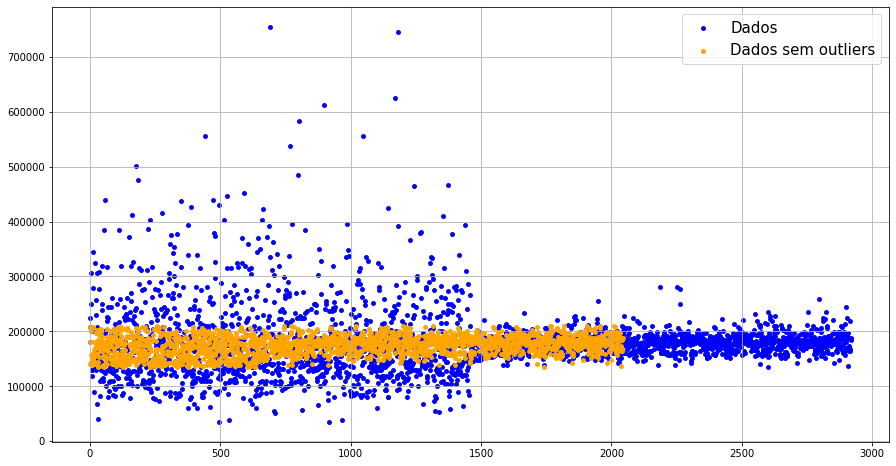

In [19]:
_ = X['SalePrice'][X['SalePrice'].between(X['SalePrice'].quantile(.15), X['SalePrice'].quantile(.85))]

print('Tamanho de dados: %i' % (len(X)))
print('Tamanho de dados sem outliers: %i' % (len(_)))
print('Diferenca: %i' % (len(X) - len(_)))

plt.figure(figsize = (15,8))
plt.scatter(range(len(X)), X['SalePrice'], color = 'blue', s = 15)
plt.scatter(range(len(_)), _, color = 'orange', s = 15)
plt.grid(True)
plt.legend(['Dados','Dados sem outliers'], loc = 'best', fontsize = 15)

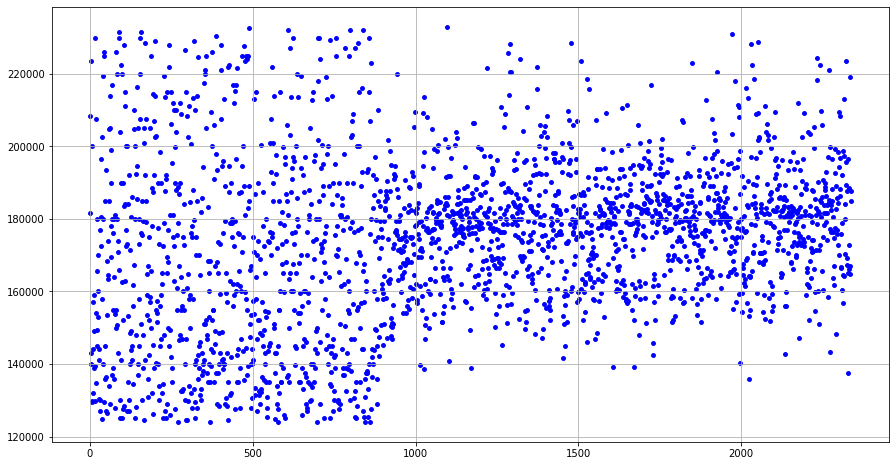

In [20]:
X = X[X['SalePrice'].between(X['SalePrice'].quantile(.1), X['SalePrice'].quantile(.9))]
# Dados sem outliers
plt.figure(figsize = (15,8))
plt.scatter(range(len(X)), X['SalePrice'], color = 'blue', s = 15)
plt.grid(True)

# Separando X e Y

In [21]:
Y = X['SalePrice']
X = X.drop(columns = ['SalePrice'])

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))
X[:] = scaler.fit_transform(X)
X.describe()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,0.268691,0.163549,0.051755,0.133590,0.396261,0.119760,0.166443,0.560688,0.712085,0.574644,0.045766,0.212281,0.073614,0.238380,0.140633,0.414350,0.444040,0.077410,0.256783,0.170209,0.210222,0.053892,0.285073,0.156946,0.175580,0.203739,0.144059,0.391895,0.195038,0.359495,0.282471,0.145851,0.179384,0.266478,0.620901,0.352076,0.314315,0.053892,0.065052,0.062154,0.065184
std,0.161253,0.068010,0.033439,0.187505,0.241930,0.276344,0.189732,0.142261,0.222497,0.339695,0.111670,0.158086,0.127521,0.186080,0.157102,0.283844,0.254551,0.077882,0.199827,0.067161,0.236918,0.225853,0.126461,0.078566,0.221092,0.086248,0.175727,0.136022,0.254243,0.100012,0.121526,0.160417,0.218689,0.078866,0.275890,0.140164,0.131761,0.186412,0.087885,0.088699,0.178025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.133562,0.037953,0.000000,0.208333,0.000000,0.000000,0.444444,0.582061,0.266667,0.000000,0.062500,0.000000,0.000000,0.000000,0.250000,0.166667,0.000000,0.100935,0.130606,0.000000,0.000000,0.250000,0.100683,0.000000,0.140783,0.000000,0.250000,0.000000,0.250000,0.166667,0.000000,0.000000,0.214744,0.333333,0.200000,0.225806,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.165431,0.049278,0.000000,0.416667,0.000000,0.142857,0.555556,0.725191,0.716667,0.000000,0.125000,0.000000,0.333333,0.200000,0.250000,0.500000,0.067417,0.213551,0.161211,0.000000,0.000000,0.250000,0.143131,0.000000,0.196084,0.000000,0.500000,0.000000,0.375000,0.250000,0.250000,0.200000,0.266389,0.666667,0.400000,0.320565,0.000000,0.000000,0.035040,0.000000
75%,0.200000,0.194349,0.061478,0.333333,0.541667,0.000000,0.142857,0.666667,0.923664,0.883333,0.000000,0.312500,0.115504,0.333333,0.200000,0.500000,0.666667,0.126993,0.370911,0.206506,0.500000,0.000000,0.250000,0.202592,0.377014,0.247182,0.333333,0.500000,0.500000,0.375000,0.333333,0.250000,0.400000,0.336538,0.666667,0.400000,0.386425,0.000000,0.117978,0.091644,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    shuffle = True,
                                                    train_size = 0.8)

In [38]:
print('Tamanho do teste: %i ' % (len(X_test)))
print('Tamanho do treino: %i ' % (len(X_train)))
print(len(X_test) + len(X_train) == len(X))

Tamanho do teste: 468 
Tamanho do treino: 1870 
True


# Testando vários modelos de regressão com Cross Val Regression

Modelos: 


* LinearRegression
* SGDRegressor
* DecisionTreeRegressor

In [25]:
def verificar_modelo(nome, modelo, X_train = X_train, Y_train = Y_train):
  pred = cross_val_predict(modelo, X_train, Y_train, cv = 10)
  erro =  mean_absolute_error(Y_train, pred)

  print('Erro do modelo %s foi de %.2f' % (nome,erro))

In [26]:
modelo = LinearRegression()
verificar_modelo('Linear regression', modelo)

Erro do modelo Linear regression foi de 14094.63


In [27]:
modelo_1 = SGDRegressor()
verificar_modelo('SGD Regressor', modelo_1)

Erro do modelo SGD Regressor foi de 14450.77


In [28]:
modelo_2 = DecisionTreeRegressor()
verificar_modelo('Decision Tree Regressor', modelo_2)

Erro do modelo Decision Tree Regressor foi de 18166.59


In [29]:
modelo_3 = SVR()
verificar_modelo('SVR', modelo_3)

Erro do modelo SVR foi de 17417.58


In [30]:
modelo_4 = AdaBoostRegressor()
verificar_modelo('AdaBoostRegressor', modelo_4)

Erro do modelo AdaBoostRegressor foi de 16620.85


In [31]:
modelo_base = DummyRegressor(strategy = 'mean')
verificar_modelo('Modelo Base', modelo_base)

Erro do modelo Modelo Base foi de 17567.76


# Validando o melhor modelo

In [32]:
modelo.fit(X_train, Y_train)
pred_1 = modelo.predict(X_test)

mae = mean_absolute_error(Y_test, pred_1)
print('Mean Absolute Error do modelo foi de: %f' % (mae))

Mean Absolute Error do modelo foi de: 14620.320656


In [33]:
modelo_base.fit(X_train, Y_train)
pred_base = modelo_base.predict(X_test)

mae = mean_absolute_error(Y_test, pred_base)
print('Mean Absolute Error do modelo foi de: %f' % (mae))

Mean Absolute Error do modelo foi de: 17720.235332


Linear Regression foi o melhor modelo

# Plotando Gráfico:

In [34]:
def mais_pred(modelo, X_train = X_train, Y_train = Y_train, X_test = X_test):
  modelo.fit(X_train, Y_train)
  return modelo.predict(X_test)

pred_sgd = mais_pred(modelo_1)
pred_tree = mais_pred(modelo_2)

In [57]:
def grafico(eixo, pred_plot, nome_do_modelo,color, Y_test = Y_test):
  eixo.grid(True)
  eixo.scatter(range(len(Y_test)),Y_test, color = 'aqua',edgecolors='k', marker = 'o', s = 25)
  eixo.plot(range(len(Y_test)), pred_plot, linewidth=0.5, color = color)

  mae = mean_absolute_error(Y_test, pred_plot)
  eixo.annotate('Mean Absolute Error: %.3f' % (mae), xy = (150, 231000), fontsize = 15)

  eixo.legend([nome_do_modelo],
            edgecolor = 'k', loc = 'upper left', fontsize = 15)
  return eixo


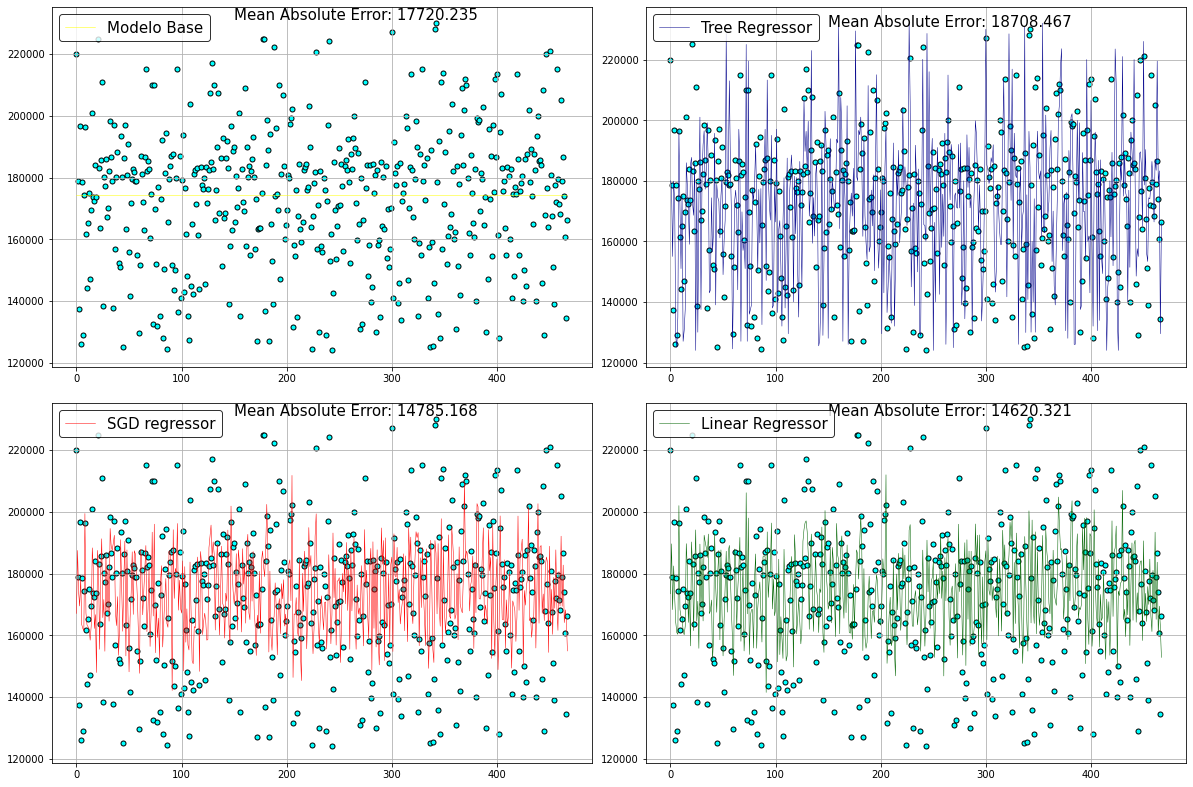

In [58]:
figure = plt.figure(figsize = (15,10))
eixo1 = figure.add_axes([0,0, 0.5,0.5])
eixo2 = figure.add_axes([0.55,0, 0.5,0.5])
eixo3 = figure.add_axes([0,0.55, 0.5,0.5])
eixo4 = figure.add_axes([0.55,0.55,0.5,0.5])


grafico(eixo1,pred_sgd,'SGD regressor', color = 'red')
grafico(eixo2,pred_1, 'Linear Regressor', color = 'darkgreen')
grafico(eixo3,pred_base, 'Modelo Base', color = 'yellow')
grafico(eixo4,pred_tree,'Tree Regressor', color = 'darkblue')

(-5.0, 473.0)

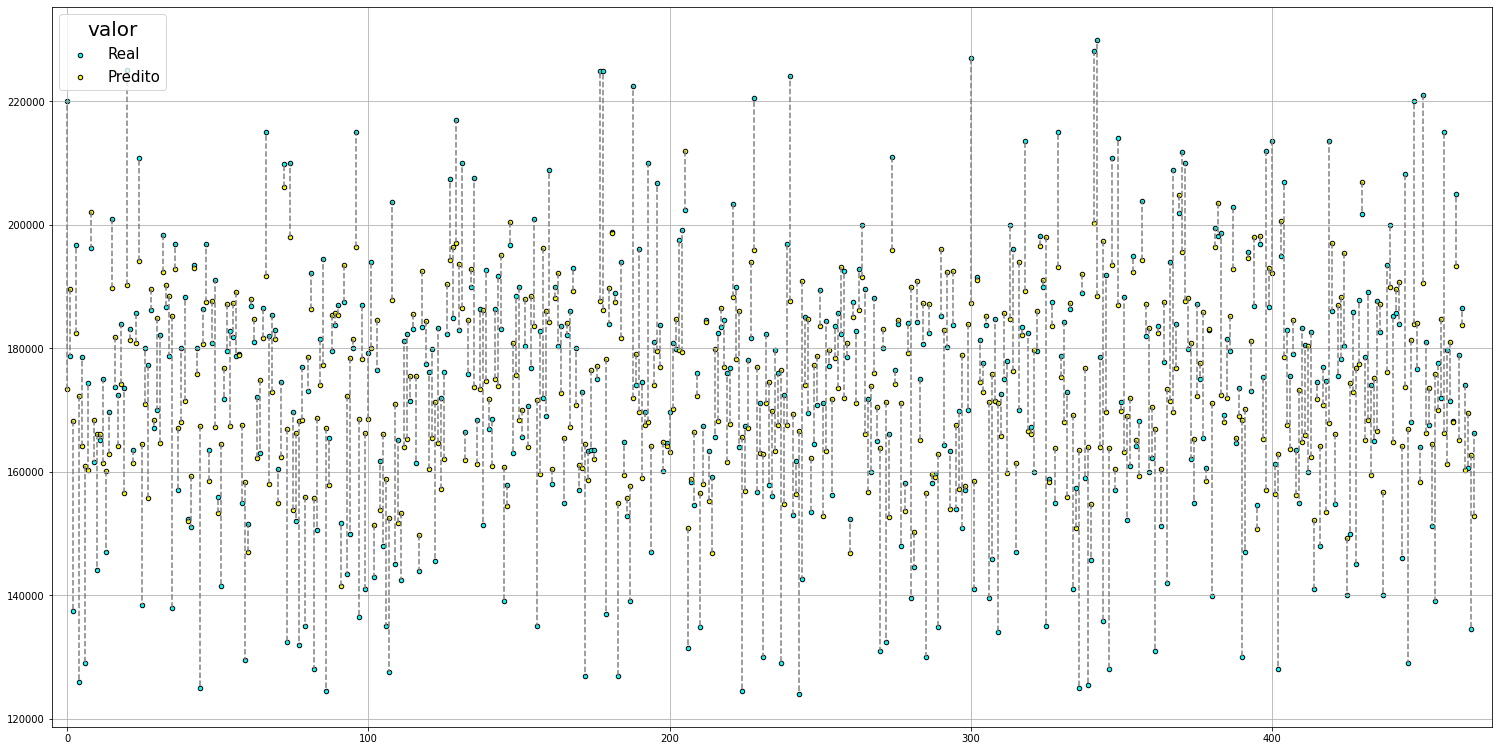

In [61]:
figure = plt.figure(figsize = (20,10))
eixo = figure.add_axes([0,0,1,1])

eixo.scatter(range(len(Y_test)),Y_test, color = 'aqua',edgecolors='k', marker = 'o', s = 20)
eixo.scatter(range(len(Y_test)),pred_1, color = 'yellow',edgecolors='k', marker = 'o', s = 20)

eixo.legend(['Real','Predito'], title = 'valor', fontsize = 15, title_fontsize = 20, loc ='upper left')
eixo.plot([range(len(Y_test)), range(len(Y_test))], [pred_1, Y_test], color = 'gray', linestyle = '--')

eixo.grid(True)
eixo.set_xlim(-5, len(X_test) + 5)
#plt.plot([df['Date'], df['Date']],[predicoes,valores_reais], linestyle = '--', color = 'grey')
